In [1]:
# 데이터 준비
# 농어의 특성 3개로 이루어진 csv파일을 판다스의 데이터프레임에 저장한다.
# csv파일은 콤마로 나누어져 있는 텍스트 파일 이다.
import pandas as pd

df = pd.read_csv('data/perch_full.csv') # 길이 , 높이 , 넓이
perch_full = df.to_numpy() # 넘파이 배열화
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
# 무게 데이터 추가
import numpy as np
 
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [10]:
# perch_full과 perch_weight를 훈련세트와 테스트 세트로 나눈다.
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [11]:
# PolynomialFeatures 클래스를 사용하여 특성 공학을 실시
from sklearn.preprocessing import PolynomialFeatures

# 우선 2,3으로 이루어진 샘플을 변환기에 적용한다.
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [12]:
# 2, 3 각특성을 제곱한 4, 9과 2, 3을 서로 곱한 6이 추가된다.
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [13]:
train_input.shape

(42, 3)

In [14]:
# train_input에 적용하여 변환데이터를 train_poly 저장
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape) #변환된 크기 확인

(42, 9)


In [15]:
# 9개 특성이 각각 어떤 입력의 조합인지 체크
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [16]:
# 훈련세트에 적용했던 변환기로 테스트 세트도 변환한다.

test_poly = poly.transform(test_input)

### 다중 회귀모델 훈련하기

In [17]:
from sklearn.linear_model import LinearRegression
 
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [18]:
# 테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 
# 과소적합 문제는 더 이상 나타나지 않았다.
print(lr.score(test_poly, test_target))

0.9714559911594155


### 규제

In [19]:
# 특성을 더 많이 추가하여 모델을 훈련할 수 있다.

# PolynomialFeatures 클래스의 degree 매개변수를 사용하여 필요한 고차원의
# 최대 차수를 지정할 수 있다.

poly = PolynomialFeatures(degree=5, include_bias=False)
 
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [20]:
# 특성 개수가 무려 55개나 늘어났다. 이 데이터를 사용해 선형회귀 모델을 다시 훈련해본다.
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


In [21]:
# 특성의 개수를 크게 늘리면 선형모델은 아주 강해져서 훈련 세트에 대해
# 거의 완벽하게 학습하여 과대적합이 되어버린다.
print(lr.score(test_poly, test_target))

-144.40744532797535


In [22]:
# 이런 과대적합을 줄이는 방법으로 규제(regularization)라는 것이 있다.

# 규제(regularization)는 머신러닝 모델의 훈련 세트를 너무 과도하게 학습
# 하지 못하도록 훼방하는 것을 말한다.

from sklearn.preprocessing import StandardScaler
 
ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [23]:
train_scaled = ss.transform(train_poly) #표준점수 변환
test_scaled = ss.transform(test_poly)  #표준점수 변환

In [24]:
# 선형회귀에서 규제를 추가한 모델을 릿지(ridge)와 라쏘(lasso)라고 부른다.

#  - 릿지는 계수를 제곱한 값을 기준으로 규제를 적용한다.
#  - 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

In [26]:
# 릿지(ridge) 회귀

from sklearn.linear_model import Ridge
 
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615386


In [29]:
import matplotlib.pyplot as plt

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)

    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

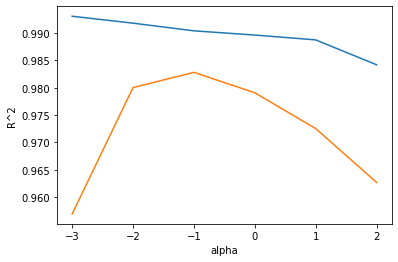

In [30]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

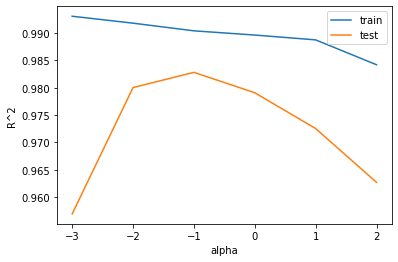

In [31]:
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.legend()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [32]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
 
# 훈련세트와 테스트 세트의 점수가 비숫하게 높고 과대적합고 과소적합 사이에
# 균형을 맞추고 있다.
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


In [34]:
# 라쏘 회귀
# Ridge클래스를 Lasso로 바꾸어 훈련하다.

from sklearn.linear_model import Lasso
 
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [35]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  positive)
C:\ProgramData\Anaconda3\envs\pydata\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401393, tolerance: 518.2793833333334
  positive)


In [36]:
# ConvergenceWarning 경고 메세지는 반복횟수가 부족할 때 나오지만 큰 영향을 끼지 
# 않으므로 경고만 보여지지 않게 코드하나만 추가한다.
import warnings
warnings.filterwarnings(action='ignore')

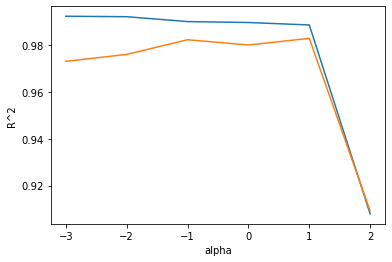

In [38]:
# 그래프를 작성.
plt.plot(np.log10(alpha_list), train_score, label='train')
plt.plot(np.log10(alpha_list), test_score, label='test')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [39]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
 
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [40]:
# 과대적합을 잘 억제하고 테스트 세트의 성능도 높였다.
# 라쏘 모델은 계수 값을 아예0으로 만들 수 있다. 
# 라쏘 모델의 계수는 coef_속성에 저장되어있다.
print(np.sum(lasso.coef_ == 0))

40
